### inter-class matrix
- s1 = (wT-w*mu)
- s1^2 = wTs1w

### combined inter-class matrix
- s1^2 + s2^2 = wT(s1 + s2)w = 

### intra-class matrix
- (m1-m2)^2 = wTBw

### objective function
- maxJ(w) = wTBw/wTSw

### eigenvector of the matrix S-1*B
- eigenvector of S-1B

In [1]:
import numpy as np
import seaborn as sns
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

<AxesSubplot:>

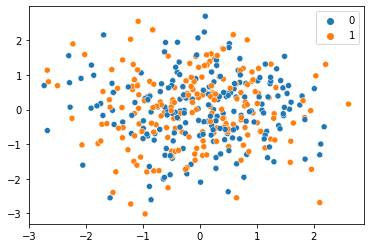

In [2]:
X, y = make_classification(n_samples=400) 
sns.scatterplot(x=X[:,1], y=X[:,2], hue = y)  

In [3]:
set(y)

{0, 1}

In [4]:
# separate groups
x1, x2 = X[y==0], X[y==1]

### inter-class (between)

In [5]:
# 1st method
mu1 = np.apply_along_axis(lambda x:np.mean(x), 0, x1).reshape(1, X.shape[1])
mu2 = np.apply_along_axis(lambda x:np.mean(x), 0, x2).reshape(1, X.shape[1])

mu_diff = mu1 - mu2
B = mu_diff*mu_diff.T

In [88]:
B.shape, X.shape

((20, 20), (400, 20))

In [47]:
# 2nd method
# scatter_t = np.cov(X.T)*(X.shape[0] - 1)
# B_ = scatter_t - S

### intra-class (within)

In [6]:
# scatter matrix for each group
s1 = (x1-mu1).T.dot(x1-mu1)
s2 = (x2-mu2).T.dot(x2-mu2)

In [7]:
# no difference between s1_ and s1
s1_ = np.cov(x1.T)*(len(x1)-1)
s2_ = np.cov(x2.T)*(len(x2)-1)

In [8]:
S = s1 + s2

In [49]:
#todo: the diff betwen pinv and inv

In [ ]:
# A = S-1*B

In [48]:
eig_values, eig_vectors =  np.linalg.eigh(np.linalg.pinv(S).dot(B))

In [89]:
eig_vectors.shape

(20, 20)

(400, 20)
[0 1]


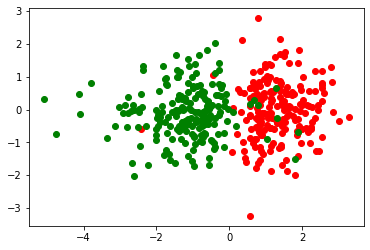

In [84]:
pc = X.dot(eig_vectors[:,::-1])
print(pc.shape)

colors = ['r','g']
labels = np.unique(y)
print(labels)

for color, label in zip(colors, labels):
    class_data = pc[np.flatnonzero(y==label)]
    plt.scatter(class_data[:,0],class_data[:,1], c=color)
plt.show()

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

# Weight vector(s).
clf.scalings_.shape

(20, 1)